In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 666.4 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 6.0 MB/s eta 0:00:0000:0100:01


In [2]:
import os
import shutil 
import random 
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.87 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5845.9/8062.4 GB disk)


In [4]:
from ultralytics import YOLO
model=YOLO('yolov10l.pt')

100%|██████████| 50.0M/50.0M [00:00<00:00, 213MB/s] 


In [5]:
from sklearn.model_selection import train_test_split

# Define paths
base_dir = '/kaggle/input/tmlc-dataset/Annotated_Data for cropping'
output_dir = '/kaggle/working/task1-yolov10'
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

# the output directories
os.makedirs(os.path.join(train_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'labels'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'labels'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'labels'), exist_ok=True)

# Get all image files
images = [f for f in os.listdir(base_dir) if f.endswith('.JPG')]

# Split the dataset into train, val, test
train_images, temp_images = train_test_split(images, test_size=0.3, random_state=42)
val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

# Function to move images and labels
def move_files(image_list, destination_dir):
    for image in image_list:
        label = image.replace('.JPG', '.txt')
        shutil.copy(os.path.join(base_dir, image), os.path.join(destination_dir, 'images', image))
        shutil.copy(os.path.join(base_dir, label), os.path.join(destination_dir, 'labels', label))

# Move files
move_files(train_images, train_dir)
move_files(val_images, val_dir)
move_files(test_images, test_dir)

print("Dataset organized successfully!")


Dataset organized successfully!


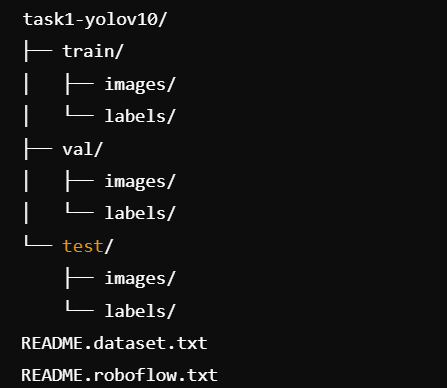

In [6]:
import yaml

# dataset.yaml content
dataset_yaml_content = {
    'train': os.path.join(train_dir, 'images'),
    'val': os.path.join(val_dir, 'images'),
    'test': os.path.join(test_dir, 'images'),
    'nc': 1, 
    'names': ['Cube'] 
}


yaml_path = os.path.join(output_dir, 'dataset.yaml')

# Save 
with open(yaml_path, 'w') as yaml_file:
    yaml.dump(dataset_yaml_content, yaml_file, default_flow_style=False)

print(f"dataset.yaml created successfully at {yaml_path}")


dataset.yaml created successfully at /kaggle/working/task1-yolov10/dataset.yaml


In [7]:
import torch
torch.cuda.empty_cache()


In [8]:
results = model.train(data='/kaggle/working/task1-yolov10/dataset.yaml', epochs=200, imgsz=640)


Ultralytics YOLOv8.2.87 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10l.pt, data=/kaggle/working/task1-yolov10/dataset.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 14.0MB/s]
2024-09-04 08:23:05,735	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-09-04 08:23:06,610	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1    137728  ultralytics.nn.modules.block.SCDown          [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1    268800  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 74.2MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/task1-yolov10/train/labels... 179 images, 0 backgrounds, 0 corrupt: 100%|██████████| 179/179 [00:00<00:00, 931.52it/s]


train: New cache created: /kaggle/working/task1-yolov10/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/task1-yolov10/val/labels... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<00:00, 919.98it/s]

val: New cache created: /kaggle/working/task1-yolov10/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 167 weight(decay=0.0), 180 weight(decay=0.0005), 179 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      13.9G      1.107      9.861      2.467         10        640: 100%|██████████| 12/12 [00:13<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]

                   all         39         39      0.589       0.59      0.585      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      13.7G      1.143      3.654      2.285         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]


                   all         39         39   0.000785      0.231    0.00052   8.22e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      13.7G      1.363      2.155      2.432          8        640: 100%|██████████| 12/12 [00:09<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         39         39   0.000785      0.231    0.00052   8.22e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      13.7G      1.369      1.647      2.475          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         39         39   0.000785      0.231    0.00052   8.22e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      13.8G      1.569      1.494       2.55         11        640: 100%|██████████| 12/12 [00:09<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         39         39   0.000785      0.231    0.00052   8.22e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      13.7G      1.682      1.527      2.623          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         39         39   0.000785      0.231    0.00052   8.22e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      13.7G      1.545      1.475      2.553          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         39         39   0.000785      0.231    0.00052   8.22e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      13.7G      1.645      1.483      2.634          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         39         39   0.000785      0.231    0.00052   8.22e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      13.7G      1.495      1.435      2.469          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         39         39   0.000785      0.231    0.00052   8.22e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      13.7G      1.372      1.273      2.438          7        640: 100%|██████████| 12/12 [00:11<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         39         39   0.000785      0.231    0.00052   8.22e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      13.7G      1.297      1.161      2.345          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         39         39   0.000785      0.231    0.00052   8.22e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200        14G      1.373      1.188      2.396         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         39         39   0.000785      0.231    0.00052   8.22e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      13.7G      1.203      1.033      2.309          4        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         39         39      0.221      0.154       0.14     0.0618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      13.7G      1.242      1.039      2.261         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         39         39      0.401       0.48      0.422      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      13.7G      1.311      1.091      2.369          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         39         39      0.594      0.718      0.724      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      13.7G       1.33      1.152      2.359         12        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         39         39      0.646      0.701      0.709       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      13.7G      1.246     0.9799      2.299         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         39         39      0.285      0.769      0.292      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      13.7G       1.12     0.7997      2.229          6        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]


                   all         39         39      0.842      0.897      0.937      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      13.7G      1.123     0.8522      2.258          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         39         39      0.416      0.795      0.661      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      13.7G      1.072     0.8796      2.173          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         39         39      0.671      0.641      0.677      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      13.7G      1.084     0.8373      2.185         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         39         39      0.973      0.897      0.978      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      13.7G      1.065     0.8325      2.177          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         39         39      0.973      0.921      0.958      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      13.7G      1.122     0.9758      2.228          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         39         39      0.816       0.91      0.928       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      13.7G      1.098     0.8618      2.164         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         39         39      0.861      0.897      0.953      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200        14G      1.009     0.7231      2.135          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         39         39      0.921      0.901      0.961      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      13.7G      1.011     0.7444      2.114          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         39         39       0.97      0.974      0.991       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      13.7G     0.9828     0.7662      2.102         11        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         39         39      0.949      0.952       0.99        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      13.7G     0.9695     0.6819      2.098          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         39         39       0.96          1      0.994      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      13.7G     0.9646      0.683      2.073          5        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         39         39      0.793      0.981      0.956      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      13.7G     0.9408     0.6591      2.101         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         39         39      0.749      0.949      0.908      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      13.7G     0.8958     0.6981       2.08          3        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         39         39      0.885      0.846      0.927      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      13.7G     0.9546     0.7015      2.127          6        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]


                   all         39         39      0.464      0.769      0.633       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      13.7G     0.9774     0.7135      2.099          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]


                   all         39         39      0.785      0.821      0.891      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      13.7G     0.9432     0.6705      2.103          6        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         39         39      0.823      0.897      0.937      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      13.7G     0.9726     0.6964      2.111         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         39         39      0.724      0.876      0.867       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      13.7G      1.076     0.7948      2.178         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         39         39      0.877      0.923      0.959      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      13.7G     0.9353      0.638      2.073          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         39         39      0.612      0.872      0.881       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      13.7G     0.9023     0.6745      2.049          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         39         39      0.975      0.997      0.994      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      13.7G     0.9538     0.6779      2.128          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         39         39      0.993          1      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      13.7G     0.8626     0.5693      1.997          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         39         39      0.994      0.974      0.994      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      13.7G     0.9007     0.6511      2.096          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]


                   all         39         39      0.989      0.949      0.988      0.934

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      13.7G     0.8875     0.6723      2.079          5        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         39         39      0.996      0.949       0.99       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      13.7G     0.8631     0.5915      2.039          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         39         39      0.851      0.846      0.925      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      13.7G     0.9097     0.6597       2.02          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         39         39      0.998          1      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      13.7G     0.8545     0.5668      2.033          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         39         39      0.901      0.949      0.977      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      13.7G     0.8935     0.6181      2.076          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         39         39      0.853      0.872      0.936      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      13.7G     0.8967     0.7008      2.066          4        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         39         39      0.672      0.897      0.928      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      13.7G     0.9289     0.6008      2.048          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         39         39      0.994          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      13.7G      0.914     0.6005      2.025         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         39         39      0.918      0.949      0.963      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      13.7G     0.9104      0.589      2.025          6        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         39         39          1      0.997      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      13.7G     0.9309     0.6112      2.086          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         39         39      0.999          1      0.995      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      13.7G     0.8929     0.5755      2.051          6        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         39         39       0.95          1      0.994      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      13.7G     0.9573     0.7345      2.093          5        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         39         39      0.972      0.974      0.993      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      13.7G     0.8803     0.5682      2.007          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]


                   all         39         39          1      0.973      0.992      0.926

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      13.7G     0.9302     0.6022      2.086          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         39         39      0.972      0.974      0.991      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      13.7G     0.9412     0.6556      2.037          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         39         39      0.998          1      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      13.7G     0.8544     0.6084      2.027          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         39         39          1      0.999      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      13.7G     0.8386     0.5535      2.027         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         39         39      0.995      0.974      0.992      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      13.7G     0.8387     0.5743      1.998          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         39         39      0.999          1      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      13.7G     0.8601       0.55      1.992          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         39         39      0.974          1      0.994      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      13.7G     0.8417     0.5495       1.99          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         39         39      0.999          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      13.7G     0.8038     0.5229      2.002          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         39         39      0.971      0.974      0.992      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      13.7G     0.8725     0.5532      2.065          6        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         39         39       0.97          1      0.995       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      13.7G     0.8571     0.6266      2.037          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         39         39      0.996          1      0.995      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      13.7G     0.8478     0.5334      2.006          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         39         39          1      0.996      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      13.7G     0.8238     0.5602      2.001         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         39         39      0.998          1      0.995      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      13.7G     0.8152     0.4977      1.995         12        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         39         39      0.619      0.923      0.958      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      13.7G     0.7688     0.4762      1.958          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         39         39      0.897      0.893      0.962      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      13.7G     0.8318     0.5291      1.991          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         39         39      0.996          1      0.995      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      13.7G     0.8529     0.5454      2.003         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]


                   all         39         39      0.974          1      0.994      0.942

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      13.7G     0.7902     0.5164      1.975         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         39         39      0.975      0.999      0.994      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      13.7G     0.8195     0.5059      2.014         12        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]


                   all         39         39          1      0.948      0.992      0.945

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      13.7G     0.8315     0.5443      2.005          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]


                   all         39         39      0.999          1      0.995      0.949

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      13.7G     0.8055      0.521      1.987          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         39         39      0.975       0.99      0.994       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      13.7G     0.7332     0.4411      1.971          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         39         39          1      0.999      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      13.7G     0.7807     0.4937      1.965          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         39         39      0.998          1      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      13.7G     0.7444     0.4732      1.972          6        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]


                   all         39         39      0.998          1      0.995      0.958

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      13.7G     0.7869     0.5168      1.962          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         39         39          1      0.996      0.995      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      13.7G     0.7625     0.5016      1.998          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]


                   all         39         39      0.992          1      0.995      0.934

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      13.7G      0.796     0.5484      2.025          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]


                   all         39         39          1      0.996      0.995      0.953

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      13.7G     0.7548     0.4777      1.969          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         39         39      0.975      0.993      0.994       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      13.7G     0.7543      0.514      1.994          5        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         39         39      0.998          1      0.995      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      13.7G     0.7817     0.5193       1.98         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         39         39      0.997          1      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      13.7G     0.7954     0.4793      2.012          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]


                   all         39         39      0.998      0.974      0.994       0.96

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      13.7G     0.7439     0.5205      1.975          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         39         39      0.997          1      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      13.7G     0.7907     0.5562      1.984          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         39         39      0.998          1      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      13.7G     0.7582     0.5306      2.004          5        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         39         39       0.99          1      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      13.7G      0.791     0.4835      1.959         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         39         39      0.998          1      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      13.7G     0.7158     0.4293      1.927          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         39         39      0.997          1      0.995      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      13.7G     0.7967     0.4967      1.987         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         39         39      0.999          1      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      13.7G     0.7821     0.4924      1.955          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         39         39          1      0.998      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      13.7G     0.7147     0.4343      1.931          6        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         39         39      0.997          1      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      13.7G      0.813     0.5242      1.985          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         39         39          1          1      0.995       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      13.7G     0.7733     0.4964      1.994          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         39         39      0.998          1      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      13.7G     0.7409     0.4685      1.962         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         39         39      0.951      0.998      0.994      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      13.7G     0.7558      0.478      1.983         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         39         39      0.999          1      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      13.7G     0.7328     0.4242      1.937          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         39         39          1      0.999      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      13.7G     0.7342     0.4476      1.959          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         39         39      0.999          1      0.995      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      13.7G     0.7878     0.4791      2.003          5        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         39         39      0.999          1      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      13.7G     0.7901     0.5376      1.971         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         39         39      0.971      0.974      0.993      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      13.7G     0.7065     0.4829      1.947         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         39         39      0.998          1      0.995      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      13.7G     0.7304     0.4631      1.957         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         39         39          1      0.921      0.986      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      13.7G     0.7998     0.5287      1.985         11        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         39         39          1      0.995      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      13.7G     0.7579     0.4896      1.949         12        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         39         39      0.997          1      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      13.7G     0.7585     0.4774       1.94          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         39         39      0.977      0.949      0.991      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      13.7G     0.7298     0.4393       1.98         12        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         39         39       0.95      0.984      0.993      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      13.7G     0.7326     0.4763      1.973          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         39         39      0.999      0.974      0.994      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      13.7G     0.7449     0.4547      1.948          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         39         39      0.995      0.974      0.994      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      13.7G     0.7072     0.4281      1.957          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         39         39          1      0.992      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      13.7G     0.7165     0.4285      1.941         11        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all         39         39      0.998      0.974      0.992       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      13.7G     0.7349      0.467      1.961          6        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         39         39          1      0.998      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      13.7G     0.7036     0.4468      1.927          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]


                   all         39         39      0.997          1      0.995      0.958

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      13.7G     0.7085     0.4396      1.954          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         39         39          1      0.994      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      13.7G     0.6961     0.4339      1.932         11        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]


                   all         39         39      0.997          1      0.995      0.968

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      13.7G     0.6994     0.4431      1.931         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         39         39      0.994          1      0.995       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      13.7G     0.7215     0.4451      1.953          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         39         39      0.946      0.891      0.977      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      13.7G      0.733      0.441      1.953          6        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         39         39      0.998          1      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      13.7G     0.6932     0.4221      1.932         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         39         39      0.999          1      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      13.7G     0.6923     0.4234       1.92          6        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         39         39      0.998          1      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      13.7G     0.6882     0.4385       1.94          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         39         39      0.998          1      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      13.7G     0.7534     0.4444       1.98          6        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         39         39      0.998          1      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      13.7G     0.6901      0.402      1.963         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         39         39      0.998          1      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      13.7G      0.714     0.4109      1.918         12        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         39         39       0.97          1      0.994      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      13.7G     0.6822     0.4242      1.937          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         39         39      0.975          1      0.994      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      13.7G     0.6766     0.4216      1.901         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         39         39      0.997          1      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      13.7G     0.6668     0.4138      1.933          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         39         39      0.999          1      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      13.7G     0.7021      0.424      1.945          5        640: 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         39         39      0.999          1      0.995      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      13.7G     0.6683     0.4242      1.922          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         39         39          1          1      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      13.7G     0.6569     0.4282      1.915          5        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         39         39      0.998          1      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      13.7G     0.6472     0.4263        1.9          5        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         39         39      0.999          1      0.995      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      13.7G     0.6791     0.4048      1.925          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         39         39      0.975      0.999      0.994      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      13.7G      0.676     0.4096      1.934         11        640: 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         39         39      0.993          1      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      13.7G     0.7215     0.4721      1.975          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         39         39      0.981          1      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      13.7G      0.731     0.4159      1.933          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         39         39      0.997          1      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      13.7G     0.6818     0.4146      1.946         12        640: 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]


                   all         39         39      0.998          1      0.995       0.96

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      13.7G      0.685     0.4523      1.915         11        640: 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         39         39      0.999          1      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      13.7G     0.7156      0.419      1.933         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         39         39      0.999          1      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      13.7G     0.6556     0.4086      1.978          3        640: 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         39         39      0.997          1      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      13.7G     0.7302     0.4904      1.964         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         39         39      0.993          1      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      13.7G     0.7272     0.4023      1.947          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         39         39      0.999          1      0.995       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      13.7G     0.7168     0.4432       1.98          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         39         39      0.999          1      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      13.7G     0.6875     0.3876      1.934         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         39         39      0.998          1      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      13.7G     0.6998     0.4343      1.961          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         39         39      0.982          1      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200        14G      0.733     0.4387      1.985          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]


                   all         39         39      0.975          1      0.995      0.966

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      13.7G     0.6438     0.4112      1.918         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         39         39      0.967      0.974      0.992       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      13.7G     0.6654     0.4317      1.924          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         39         39      0.925          1      0.991      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      13.7G     0.6487     0.3787      1.917         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         39         39      0.975      0.998      0.994      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      13.7G     0.6676     0.3556      1.926          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         39         39          1      0.998      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      13.7G     0.6564     0.3665       1.91          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         39         39      0.998          1      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      13.7G     0.6364     0.3699      1.901          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         39         39      0.998          1      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      13.7G      0.667     0.4071       1.93         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         39         39      0.998          1      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      13.7G      0.653     0.3848      1.936          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         39         39      0.998          1      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      13.7G     0.6192     0.3336      1.916          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         39         39      0.998          1      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      13.7G     0.6318     0.3976      1.944          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]


                   all         39         39      0.998          1      0.995       0.97

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      13.7G     0.6406     0.3777      1.914         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         39         39      0.998          1      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      13.7G     0.6625     0.3803      1.903          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         39         39      0.999          1      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      13.7G     0.6446      0.376        1.9         11        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         39         39      0.999          1      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      13.7G     0.6087     0.3754      1.886         12        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         39         39      0.999          1      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      13.7G     0.6334     0.3745      1.881          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         39         39      0.999          1      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      13.7G     0.6043     0.3445       1.91         12        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         39         39      0.999          1      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      13.7G     0.6163     0.4594      1.899          4        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]


                   all         39         39      0.998          1      0.995      0.963

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      13.7G     0.6706     0.3939       1.95          6        640: 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         39         39      0.999          1      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      13.7G     0.6376     0.3865      1.914          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]


                   all         39         39          1      0.999      0.995      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      13.7G     0.6435     0.3656      1.933          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         39         39      0.998          1      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      13.7G      0.677     0.4226       1.99          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         39         39      0.973      0.974      0.993      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      13.7G     0.6345     0.3926      1.918         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         39         39          1      0.973      0.994      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      13.7G     0.6368     0.3956      1.924         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         39         39      0.995          1      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      13.7G     0.6266      0.388      1.918          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         39         39      0.998          1      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      13.7G     0.6668     0.3823      1.922         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         39         39      0.983          1      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      13.7G     0.6454     0.4247       1.96          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         39         39      0.998          1      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      13.7G     0.6131      0.378      1.901         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         39         39      0.996          1      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      13.7G     0.6442     0.4018      1.937          5        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         39         39      0.999          1      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      13.7G     0.6366     0.3979      1.948          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         39         39      0.998          1      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      13.7G     0.6409     0.3759      1.908          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         39         39      0.998          1      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      13.7G     0.6234     0.3519      1.921          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         39         39      0.997          1      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      13.7G      0.591     0.3225      1.883          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         39         39      0.997          1      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      13.7G     0.6477      0.418      1.948          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         39         39      0.999          1      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      13.7G     0.6149     0.3547      1.913          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         39         39      0.999          1      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      13.7G     0.6146     0.3844      1.914         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]


                   all         39         39      0.999          1      0.995       0.96

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      13.7G     0.6211     0.3656      1.899          6        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         39         39      0.997          1      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      13.7G      0.624     0.3448      1.935          5        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         39         39      0.997          1      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      13.7G     0.6278     0.3435      1.914         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         39         39      0.997          1      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      13.7G     0.6041     0.3628      1.928          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]


                   all         39         39      0.998          1      0.995      0.961

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      13.7G     0.5864     0.3197      1.907         10        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         39         39      0.999          1      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      13.7G     0.5557     0.3445      1.847          5        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         39         39          1      0.997      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      13.7G     0.5705     0.3399      1.854          9        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         39         39      0.999          1      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      13.7G     0.6227     0.3624       1.92          7        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         39         39      0.999          1      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      13.7G     0.6117     0.3722      1.906          8        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]


                   all         39         39      0.999          1      0.995      0.969

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      13.7G     0.5897      0.361      1.912          6        640: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         39         39      0.999          1      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      13.7G     0.5998     0.3535        1.9          5        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         39         39      0.999          1      0.995      0.971


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      13.7G     0.4151     0.4258      1.803          3        640: 100%|██████████| 12/12 [00:15<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         39         39      0.998          1      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      13.7G     0.4252     0.2793      1.801          3        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]


                   all         39         39      0.999          1      0.995      0.973

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      13.7G     0.3919     0.2017       1.82          3        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]


                   all         39         39      0.999          1      0.995      0.973

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      13.7G     0.4153     0.1978      1.787          3        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         39         39      0.999          1      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      13.7G     0.4164     0.1883       1.79          3        640: 100%|██████████| 12/12 [00:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         39         39      0.999          1      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      13.7G     0.4116      0.201      1.801          3        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]


                   all         39         39      0.999          1      0.995      0.969

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      13.7G      0.378     0.1739      1.829          3        640: 100%|██████████| 12/12 [00:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         39         39      0.999          1      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      13.7G     0.6216     0.5965      2.126          3        640: 100%|██████████| 12/12 [00:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         39         39      0.998          1      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      13.7G     0.4053     0.1977      1.827          3        640: 100%|██████████| 12/12 [00:10<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         39         39      0.999          1      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      13.7G     0.4006     0.1855      1.823          3        640: 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         39         39          1      0.999      0.995       0.97



200 epochs completed in 0.806 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.87 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10l summary (fused): 461 layers, 25,717,910 parameters, 0 gradients, 126.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]


                   all         39         39      0.999          1      0.995      0.973
Speed: 0.2ms preprocess, 19.6ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train


In [9]:
# Path 
model_path = '/kaggle/working/runs/detect/train/weights/best.pt'

#  the best model weights
best_model = YOLO(model_path)

In [10]:
images_test = ["/kaggle/working/task1-yolov10/test/images/CN6-3-008_00183.JPG",
               "/kaggle/working/task1-yolov10/test/images/CN5-3-022_00268.JPG",
               "/kaggle/working/task1-yolov10/test/images/CN6-1-010_00194.JPG"]

images = []
for i in range(len(images_test)):
    yolo_outputs = best_model.predict(images_test[i])
    output = yolo_outputs[0]
    box = output.boxes
    names = output.names

    for j in range(len(box)):
        labels = names[box.cls[j].item()]
        coordinates = box.xyxy[j].tolist()
        confidence = np.round(box.conf[j].item(), 2)
        
        print(f'Object {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}')
        print('-------')

    # Store the image in the 'images' list
    images.append(output.plot()[:, :, ::-1])


image 1/1 /kaggle/working/task1-yolov10/test/images/CN6-3-008_00183.JPG: 608x640 1 Cube, 57.4ms
Speed: 3.4ms preprocess, 57.4ms inference, 0.6ms postprocess per image at shape (1, 3, 608, 640)
Object 1 is: Cube
Coordinates are: [253.3897247314453, 141.81861877441406, 3773.295166015625, 3565.59423828125]
Confidence is: 0.97
-------

image 1/1 /kaggle/working/task1-yolov10/test/images/CN5-3-022_00268.JPG: 640x640 1 Cube, 56.0ms
Speed: 3.6ms preprocess, 56.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Object 1 is: Cube
Coordinates are: [207.74179077148438, 334.8064270019531, 3697.975341796875, 3753.318359375]
Confidence is: 0.98
-------

image 1/1 /kaggle/working/task1-yolov10/test/images/CN6-1-010_00194.JPG: 608x640 1 Cube, 54.8ms
Speed: 3.3ms preprocess, 54.8ms inference, 0.5ms postprocess per image at shape (1, 3, 608, 640)
Object 1 is: Cube
Coordinates are: [153.18556213378906, 125.37895965576172, 3655.498291015625, 3519.71240234375]
Confidence is: 0.97
-------

In [11]:
import os
import numpy as np

# the directory containing the test images
test_images_dir = "/kaggle/working/task1-yolov10/test/images"

# the list of all image files in the directory
images_test = [os.path.join(test_images_dir, img) for img in os.listdir(test_images_dir) if img.endswith('.JPG')]

# Initialize a list to store the output images with detections
images = []

# Loop through each image and run the YOLO model predictions
for image_path in images_test:
    yolo_outputs = best_model.predict(image_path)
    output = yolo_outputs[0]
    box = output.boxes
    names = output.names

    for j in range(len(box)):
        labels = names[box.cls[j].item()]
        coordinates = box.xyxy[j].tolist()
        confidence = np.round(box.conf[j].item(), 2)
        
        print(f'Object {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}')
        print('-------')

    # Store the image in the 'images' list with detections plotted
    images.append(output.plot()[:, :, ::-1])




image 1/1 /kaggle/working/task1-yolov10/test/images/CN6-B-008_00047.JPG: 448x640 1 Cube, 56.6ms
Speed: 3.2ms preprocess, 56.6ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
Object 1 is: Cube
Coordinates are: [1148.1571044921875, 217.81068420410156, 4660.11376953125, 3732.0263671875]
Confidence is: 0.97
-------

image 1/1 /kaggle/working/task1-yolov10/test/images/CN5-1-018_00103.JPG: 448x640 1 Cube, 42.7ms
Speed: 3.0ms preprocess, 42.7ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
Object 1 is: Cube
Coordinates are: [1630.6751708984375, 717.3062133789062, 4409.20703125, 3484.948486328125]
Confidence is: 0.96
-------

image 1/1 /kaggle/working/task1-yolov10/test/images/CN7-4-004_00022.JPG: 448x640 1 Cube, 42.7ms
Speed: 3.0ms preprocess, 42.7ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
Object 1 is: Cube
Coordinates are: [1415.219970703125, 512.1343994140625, 4444.3232421875, 3494.24951171875]
Confidence is: 0.97
-------

imag

### 3. Detection Results

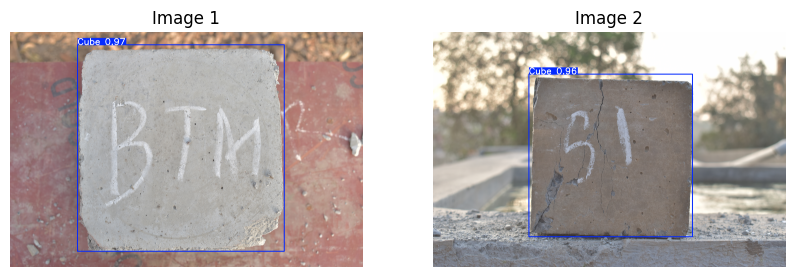

In [12]:
import matplotlib.pyplot as plt

# Number of images to display
num_images_to_display = 2

#  a figure to display images
plt.figure(figsize=(10, 10))

for i in range(num_images_to_display):
    #  a subplot for each image
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(f"Image {i + 1}")

# Display 
plt.show()


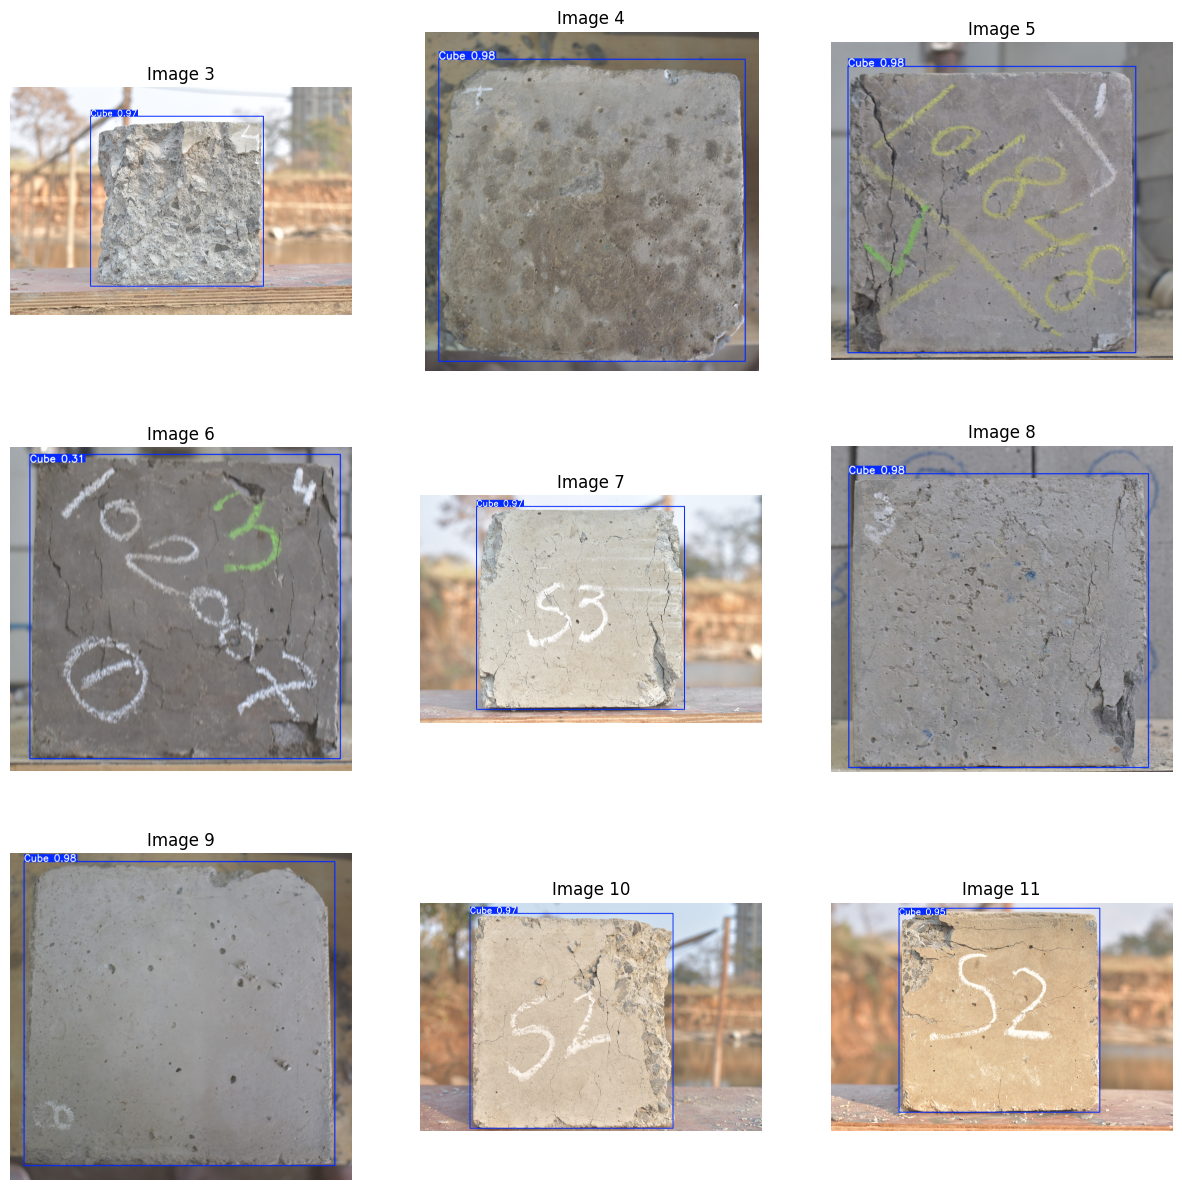

In [13]:
import matplotlib.pyplot as plt

# number of images to display in the grid
num_images_to_display = 9

# a figure with a 3x3 grid
plt.figure(figsize=(15, 15))

for i in range(num_images_to_display):
    #  a subplot for each image in a 3x3 grid
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i + 2])  # Starting from the 3rd image (index 2)
    plt.axis('off')
    plt.title(f"Image {i + 3}")  # Titles as Image 3 to Image 11

# Display 
plt.show()


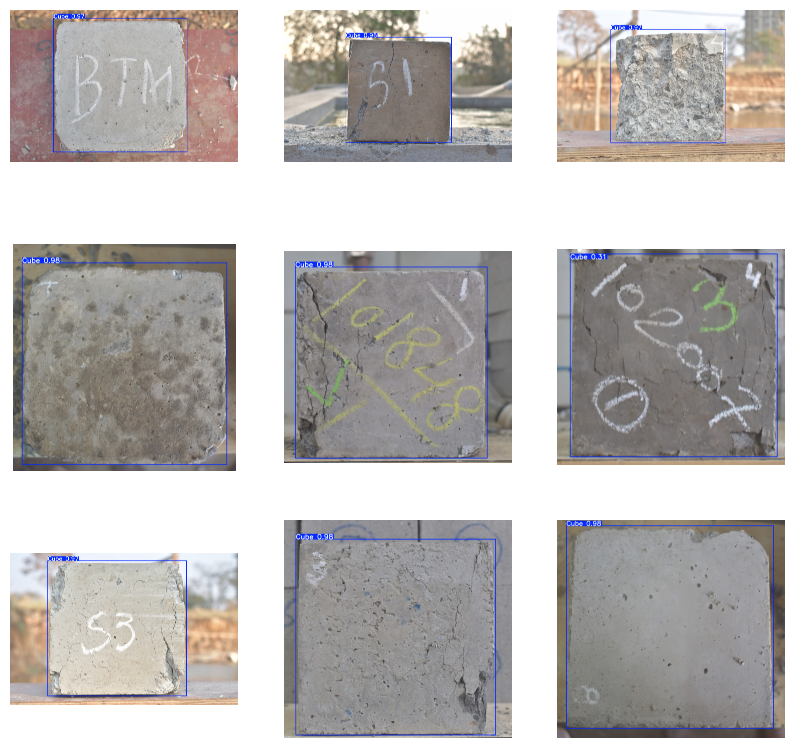

In [14]:
import cv2
import matplotlib.pyplot as plt

# Display the first image with bounding boxes and labels
plt.figure(figsize=(10, 10))
for idx in range(9):
    plt.subplot(3, 3, idx + 1)
    plt.imshow(images[idx])
    plt.axis('off')
plt.show()
